# 1. DS-420 Project 2
**by Jorge Contreras**

### 2. Frame the problem and look at the big picture:

The age of abalone (a type of marine snail) is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope, killing or harming the animal. Other measurements, which are easier to obtain, such as sex, length, diameter, height, and others will be used to attempt to predict their age. **Number of rings in Abalone (+1.5 to get age in years)**

**Link to dataset:** https://www.kaggle.com/rodolfomendes/abalone-dataset

In [237]:
# Common imports
import numpy as np
import pandas as pd
import sklearn as sk
import os

# Set plotting options
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 3. Read in the data, assign column names:
A total of 9 variables, however, **"Rings"** is my label variable and will change it to age (by adding 1.5)

In [238]:
abalones = pd.read_csv ("abalone.csv")
abalones.rename(columns = {"Sex":"sex", "Length":"length", "Diameter":"diameter","Height":"height", "Whole weight":"whole_weight",
                   "Shucked weight":"shucked_weight", "Viscera weight":"viscera_weight",
                   "Shell weight":"shell_weight", "Rings":"rings"}, inplace = True)

abalones['age'] = abalones['rings'] + 1.5
abalones.drop('rings', axis = 1, inplace = True)
print (abalones.shape)  # Shows number of rows and columns
pd.DataFrame.head (abalones)

(4177, 9)


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


### 4. Explore the data:
**A1. Histograms of variables (quantitative):**

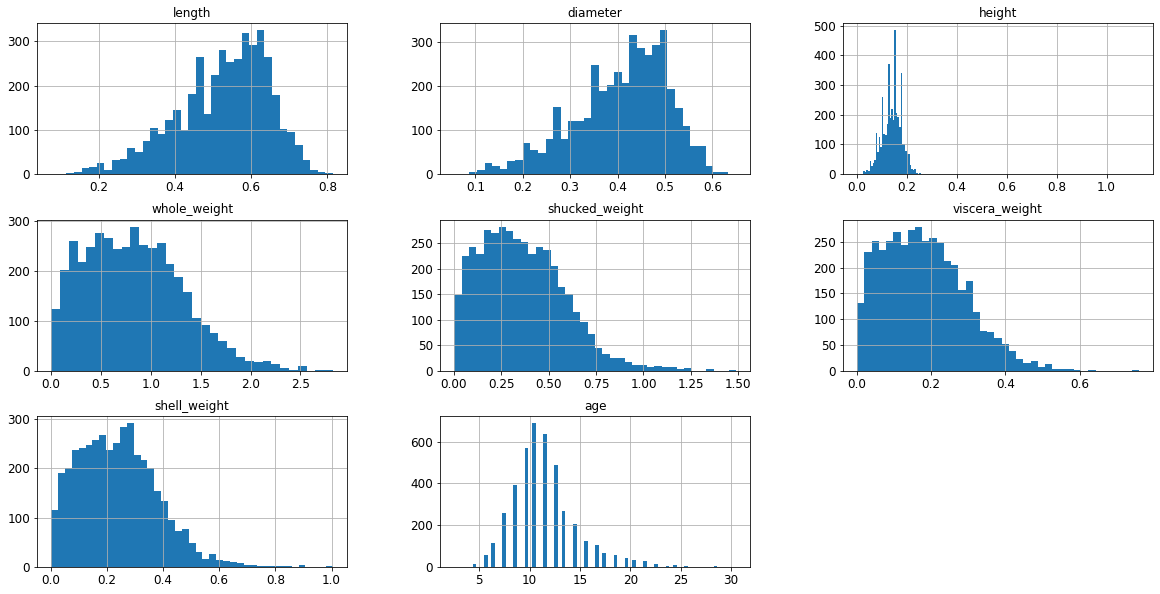

In [239]:
abalones.hist (bins='auto', figsize=(20,10))   
plt.show()

**A2. Frequency table for the qualitative varibale:**

In [240]:
np.unique(abalones["sex"],return_counts=True)

(array(['F', 'I', 'M'], dtype=object), array([1307, 1342, 1528]))

**B. Extent of missing data:** <br>
No need to impute. There is no missing data as we can see in the following table:

In [241]:
abalones.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


**C. Do missing value imputation:** <br>
Again, not neccesary. Let's look at the count just to be sure:

In [242]:
abalones.count()

sex               4177
length            4177
diameter          4177
height            4177
whole_weight      4177
shucked_weight    4177
viscera_weight    4177
shell_weight      4177
age               4177
dtype: int64

**D. At a first glance none of the the histograms show extreme skewness and therefore require no transformation:**

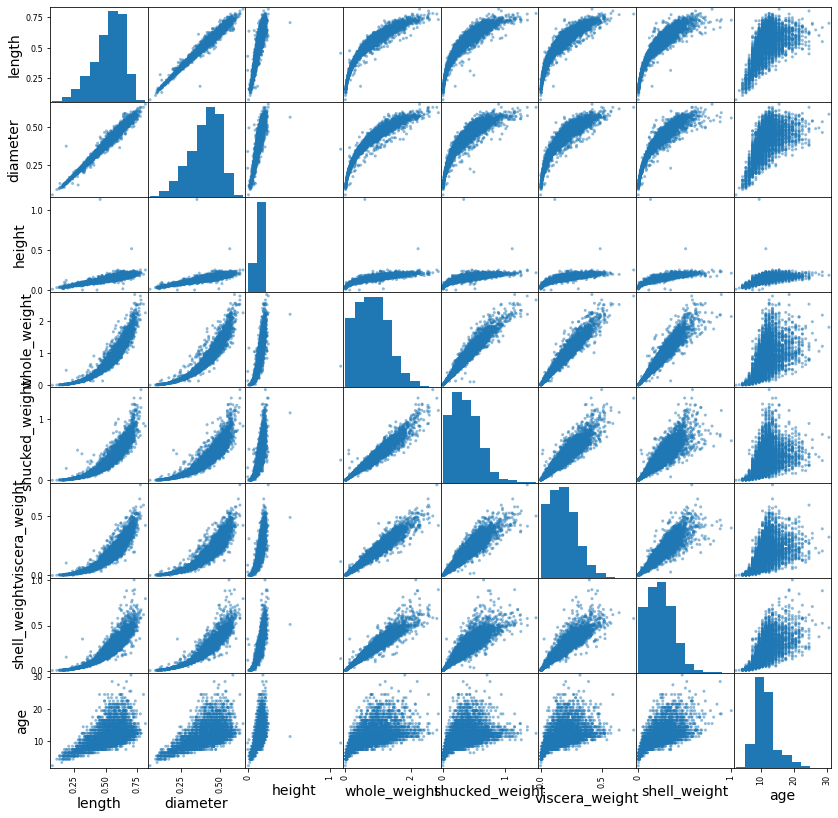

In [243]:
pd.plotting.scatter_matrix(abalones, figsize=(14,14))
plt.show()

**Notice the minimum value for height is zero:**

In [244]:
abalones[abalones['height'] == 0]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,9.5
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,7.5


**Therefore these rows will be excluded:**

In [245]:
abalones.drop(index=[1257,3996], inplace = True)

**Checking skewness again:**

In [246]:
abalones.skew().sort_values(ascending = False)

height            3.166364
age               1.113754
shucked_weight    0.718735
shell_weight      0.621081
viscera_weight    0.591455
whole_weight      0.530549
diameter         -0.610182
length           -0.640993
dtype: float64

**Using square root transformation on the height as it has a high skewness:**

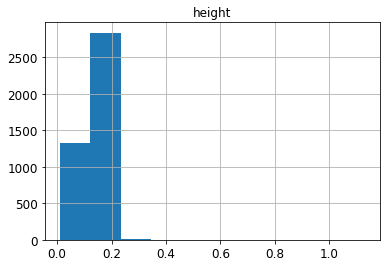

In [247]:
abalones.hist(column="height")
plt.show()
abalones['height'] = np.sqrt(abalones['height'])

**Checking skewness one last time:**

In [248]:
abalones.skew().sort_values(ascending = False)

age               1.113754
shucked_weight    0.718735
shell_weight      0.621081
viscera_weight    0.591455
whole_weight      0.530549
height           -0.176012
diameter         -0.610182
length           -0.640993
dtype: float64

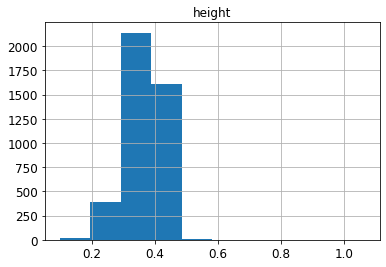

In [249]:
abalones.hist(column="height")
plt.show()

**Checking correlation: no negative correlation found**


In [250]:
corr_matrix = abalones.corr()
corr_matrix["age"].sort_values(ascending=False)

age               1.000000
shell_weight      0.627928
height            0.596076
diameter          0.574418
length            0.556464
whole_weight      0.540151
viscera_weight    0.503562
shucked_weight    0.420597
Name: age, dtype: float64

**shell_weight shows high correlation with age:**

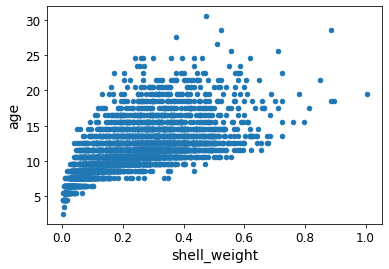

In [251]:
abalones.plot(kind="scatter", x="shell_weight", y="age")
plt.show()

In [252]:
pd.DataFrame (abalones["shell_weight"])

,shell_weight
0,0.1500
1,0.0700
2,0.2100
3,0.1550
4,0.0550
...,...
4172,0.2490
4173,0.2605
4174,0.3080
4175,0.2960


### 5. Prepare the data:

**Create a matrix of features (X: independant variables) and a dependant variable (Y):**

In [253]:
X = abalones.iloc[:, :-1].values
y = abalones.iloc[:, -1].values

In [254]:
print(X)
type(X)

[['M' 0.455 0.365 ... 0.2245 0.101 0.15]
 ['M' 0.35 0.265 ... 0.0995 0.0485 0.07]
 ['F' 0.53 0.42 ... 0.2565 0.1415 0.21]
 ...
 ['M' 0.6 0.475 ... 0.5255 0.2875 0.308]
 ['F' 0.625 0.485 ... 0.531 0.261 0.296]
 ['M' 0.71 0.555 ... 0.9455 0.3765 0.495]]


numpy.ndarray

In [255]:
print(y)
type(y)

[16.5  8.5 10.5 ... 10.5 11.5 13.5]


numpy.ndarray

**Encoding categorical data: Sex (first column) will be categorised by males and females only. This data will be changed into binary vectors. The dummy variable trap will be dealt with by dropping the first column:**

In [256]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(drop = 'first'), [0])], remainder= 'passthrough')
X = np.array(ct.fit_transform(X))

In [257]:
print(X)
type(X)

[[0.0 1.0 0.455 ... 0.2245 0.101 0.15]
 [0.0 1.0 0.35 ... 0.0995 0.0485 0.07]
 [0.0 0.0 0.53 ... 0.2565 0.1415 0.21]
 ...
 [0.0 1.0 0.6 ... 0.5255 0.2875 0.308]
 [0.0 0.0 0.625 ... 0.531 0.261 0.296]
 [0.0 1.0 0.71 ... 0.9455 0.3765 0.495]]


numpy.ndarray

In [258]:
print(pd.DataFrame(X))

        0    1      2      3         4       5       6       7       8
0     0.0  1.0  0.455  0.365  0.308221   0.514  0.2245   0.101    0.15
1     0.0  1.0   0.35  0.265       0.3  0.2255  0.0995  0.0485    0.07
2     0.0  0.0   0.53   0.42  0.367423   0.677  0.2565  0.1415    0.21
3     0.0  1.0   0.44  0.365  0.353553   0.516  0.2155   0.114   0.155
4     1.0  0.0   0.33  0.255  0.282843   0.205  0.0895  0.0395   0.055
...   ...  ...    ...    ...       ...     ...     ...     ...     ...
4170  0.0  0.0  0.565   0.45  0.406202   0.887    0.37   0.239   0.249
4171  0.0  1.0   0.59   0.44  0.367423   0.966   0.439  0.2145  0.2605
4172  0.0  1.0    0.6  0.475  0.452769   1.176  0.5255  0.2875   0.308
4173  0.0  0.0  0.625  0.485  0.387298  1.0945   0.531   0.261   0.296
4174  0.0  1.0   0.71  0.555  0.441588  1.9485  0.9455  0.3765   0.495

[4175 rows x 9 columns]


### 6.  Include your best model from Project #1

**A. Divide the data at random into training (80%) and validation (20%) sets**

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**RFR Model:**

In [260]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 400)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=400)

In [261]:
y_pred = regressor.predict(X_test)

**RFR Model results and performance measures:**

In [262]:
from sklearn.metrics import mean_squared_error

tr_predictions = regressor.predict(X_train)
rfr_mse = mean_squared_error(y_train, tr_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print(f"The RF Train RMSE is {rfr_rmse:.2f}")

The RF Train RMSE is 0.79


In [263]:
tst_predictions = regressor.predict(X_test)
rfr_mse = mean_squared_error(y_test, tst_predictions)
rfr_rmse = np.sqrt(rfr_mse)
print(f"The RF Test RMSE is {rfr_rmse:.2f}")

The RF Test RMSE is 0.83


In [264]:
from sklearn.metrics import r2_score
rfr_r2 = r2_score(y_train, tr_predictions)
print(f"The RF Train R2 Score is {rfr_r2:.2f}")

The RF Train R2 Score is 0.94


In [265]:
rfr_r2 = r2_score(y_test, tst_predictions)
print(f"The RF Test R2 Score is {rfr_r2:.2f}")

The RF Test R2 Score is 0.94


In [266]:
rf_data = y_pred[:7]
rf_labels = y_test[:7]

print("Predictions:" ,rf_data)
print("Labels:", list(rf_labels))

Predictions: [16.6025  9.055  10.7975 12.0325 11.1225 10.3975 12.425 ]
Labels: [16.5, 8.5, 12.5, 12.5, 10.5, 10.5, 12.5]


**Diagnostic plots:**

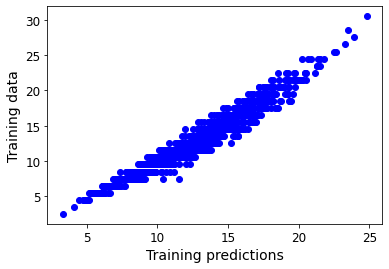

In [267]:
plt.plot(tr_predictions, y_train, "bo")
plt.xlabel ("Training predictions", fontsize=14)
plt.ylabel ("Training data", fontsize=14)
plt.show()

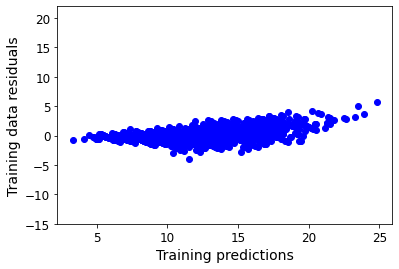

In [268]:
tr_resid = (y_train - tr_predictions)
plt.ylim(-15,22)
plt.plot(tr_predictions, tr_resid, "bo")
plt.xlabel ("Training predictions", fontsize=14)
plt.ylabel ("Training data residuals", fontsize=14)
plt.show()

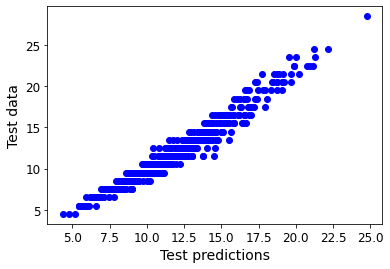

In [269]:
plt.plot(tst_predictions, y_test, "bo")
plt.xlabel ("Test predictions", fontsize=14)
plt.ylabel ("Test data", fontsize=14)
plt.show()

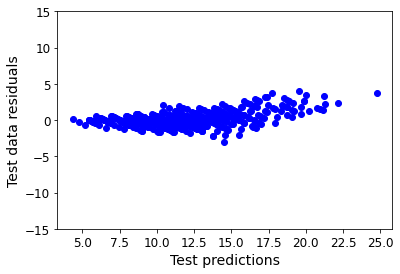

In [270]:
tst_resid = (y_test - tst_predictions)
plt.ylim(-15,15)
plt.plot(tst_predictions, tst_resid, "bo")
plt.xlabel ("Test predictions", fontsize=14)
plt.ylabel ("Test data residuals", fontsize=14)
plt.show()

In [271]:
def plot_learning_curves(model, X, y, score_fun, score_label):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    #print ("Validation set labels:", y_val)
    train_prec, val_prec = [], []
    for m in range(10, 500):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_prec.append(score_fun(y_train_predict, y_train[:m]))
        val_prec.append(score_fun(y_val_predict, y_val))
        
    plt.plot(np.arange (10, m+1), train_prec, "r-+", linewidth=2, label="train")
    plt.plot(np.arange (10, m+1), val_prec, "b-", linewidth=3, label="val")
    plt.legend()
    plt.xlabel ("# Training Instances")
    plt.ylabel (score_label)

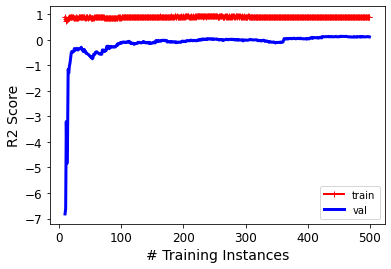

In [272]:
plot_learning_curves(regressor, X, y, r2_score, "R2 Score")

### 7. Choose one neural network architecture (DNN, CNN, or RNN) and train the model

In [273]:
X_train.shape

(3340, 9)

**Transformation of data to class float64 so that it can be used in the NN model:**

In [274]:
print(type(X_train))
print(type(y_train))
print(type(y_train[0]))
print(type(X_train[0,0]))
X_train = X_train.astype('float64')
print(type(X_train[0,0]))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.float64'>
<class 'float'>
<class 'numpy.float64'>
(3340, 9)
(3340,)


**DNN Regresor model:**

In [275]:
import tensorflow as tf
feature_cols = [tf.feature_column.numeric_column("X", shape=9)]
dnn_clf = tf.estimator.DNNRegressor(hidden_units=[20,10,5],
                                 feature_columns=feature_cols)

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=20, batch_size=150, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmb9qbl0u', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7ff1042bd9d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done c

In [276]:
X_test = X_test.astype('float64')

In [277]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)
eval_results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-12-14T23:11:49Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmb9qbl0u/model.ckpt-446
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2021-12-14-23:11:50
INFO:tensorflow:Saving dict for global step 446: average_loss = 5.2887006, global_step = 446, label/mean = 11.4497, loss = 630.8664, prediction/mean = 11.269757
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 446: /tmp/tmpmb9qbl0u/model.ckpt-446


{'average_loss': 5.2887006,
 'label/mean': 11.4497,
 'loss': 630.8664,
 'prediction/mean': 11.269757,
 'global_step': 446}

In [278]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)

print (y_pred[0])
m_test = len (y_pred)
y_pred_1d = np.ndarray (m_test)

for yrow in np.arange(m_test):
    y_pred_1d [yrow] = y_pred[yrow]['predictions']
    
print (type (y_pred_1d), y_pred_1d[0:10])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmb9qbl0u/model.ckpt-446
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([14.051093], dtype=float32)}
<class 'numpy.ndarray'> [14.0510931   9.18923569  8.34992504 11.31014347 12.09950352  9.47700596
 12.59319592 10.56354809 15.29308605 12.50238514]


In [279]:
type(y_pred_iter)
type(y_pred)
print(len(y_pred))
y_pred[0]
print(y_pred_1d)

835
[14.0510931   9.18923569  8.34992504 11.31014347 12.09950352  9.47700596
 12.59319592 10.56354809 15.29308605 12.50238514  9.31036472 14.46262836
 11.30398464 12.70221615 13.59355259 17.11655235  9.97577572 10.30323696
  9.7565546   9.8779726   9.50561333 10.57890034  9.27205563 10.87114429
 19.25011253 12.05695629 12.7163868  11.94435024  8.57415867 12.75506878
 12.14203262 11.3711729  11.66434193 13.22264767  9.30889702 12.40498829
 10.60517693 12.70575714  7.79064989  5.62682581 11.02838802 10.63152409
 13.11207294  8.13313389 11.41079807  8.59156609  5.82181311  9.22457504
 12.18218803 12.31926537 12.68661308 11.12597275 10.52764511 10.15326786
  7.30464411 13.9028616  11.56838226 13.16961002 12.19278812 11.8091898
 11.36178303  7.66004658 12.97228527 10.08759785 12.90946674 18.5403347
  9.66936684  9.47591209 14.2890749  13.04245758 15.05935383  7.59510088
 10.43963909 11.44211674 12.39152241  8.48060989 14.3850832   7.35940599
  6.74643278  5.16055346  8.3968277  13.20072651 

**DNN Regressor results and performance measures:**

In [288]:
nn_mse = mean_squared_error (y_test, y_pred_1d)
nn_rmse = np.sqrt(nn_mse)
print (f"The NN Test RMSE is {nn_rmse:.2f}")

The NN Test RMSE is 2.30


In [281]:
nn_r2 = r2_score(y_test, y_pred_1d)
print(f"NN Test R2 Score is {nn_r2:.2f}")

NN Test R2 Score is 0.54


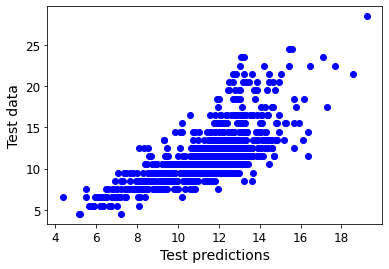

In [284]:
plt.plot(y_pred_1d, y_test, "bo")
plt.xlabel ("Test predictions", fontsize=14)
plt.ylabel ("Test data", fontsize=14)
plt.show()

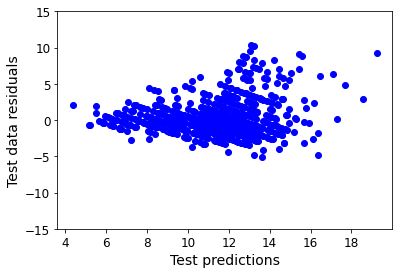

In [286]:
tst_resid_1d = (y_test - y_pred_1d)
plt.ylim(-15,15)
plt.plot(y_pred_1d, tst_resid_1d, "bo")
plt.xlabel ("Test predictions", fontsize=14)
plt.ylabel ("Test data residuals", fontsize=14)
plt.show()

**Comparing RF to DNN performance:**

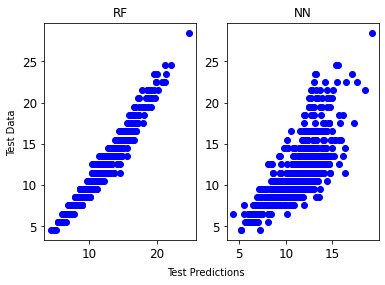

In [282]:
fig,(ax1,ax2)=plt.subplots(1,2)

ax1.plot(tst_predictions, y_test, "bo")
ax1.set_title ("RF")
ax2.plot(y_pred_1d, y_test, "bo")
ax2.set_title ("NN")
fig.text(0.5, 0.001, 'Test Predictions', ha='center')
fig.text(0.04, 0.5, 'Test Data', va='center', rotation='vertical')
fig.show()


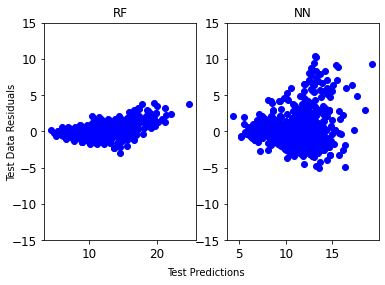

In [283]:
fig,(ax1,ax2)=plt.subplots(1,2)

ax1.plot(tst_predictions, tst_resid, "bo")
ax1.set_ylim(-15,15)
ax1.set_title ("RF")
ax2.plot(y_pred_1d, tst_resid_1d, "bo")
ax2.set_ylim(-15,15)
ax2.set_title ("NN")
fig.text(0.5, 0.001, 'Test Predictions', ha='center')
fig.text(0.04, 0.5, 'Test Data Residuals', va='center', rotation='vertical')
fig.show()

### 8. Conclusions:

1. It seems that it is possible to predict the age of Abalones without having to physically count their rings
2. RF is performing much better than DNN as we can see by comparing their RMSEs and R2 scores
3. Although RF is performing better DNN might perform better than RF if we had more rows of data
4. Visually we can see on the graphs that RF predictions are not as scattered as DNN predictions making RF predictions more accurate
5. Different hyperparameters were explored with both RF and DNN models, the ones presented are the ones that presented the best results 